**Как пользоваться nbconvert**

nbconvernt моежт быть использован как утилита командной строки или же python библиотека. Тут я буду рассматривать nbconvert как python библиотеку.

In [1]:
import io

import nbformat

import matplotlib as mpl
import matplotlib.pyplot as plt

from traitlets.config import Config

from nbconvert import HTMLExporter,\
                        RSTExporter

# Источники

- https://nbconvert.readthedocs.io/en/latest/index.html - официальная документация nbconvert.
- https://nbconvert.readthedocs.io/en/latest/api/exporters.html#nbconvert.exporters.NotebookExporter - страница документации посвященная Exporters;
- https://nbconvert.readthedocs.io/en/latest/api/preprocessors.html - препроцессоры доступные по умолчанию.

# Прочитать notebook

<a id="botebooknode"></a>
Используя `nbformat.read` я могу прочесть произвольный notebook из `str`. Получается, объект типа `nbformat.notebooknode.NotebookNode`.

In [2]:
# читаю notebook как str
nbfile = open("XKCD_plots.ipynb", "r")
note_book_txt = nbfile.read()
nbfile.close()

# из строчки делаю nbformat.notebooknode.NotebookNode
notebook = nbformat.reads(note_book_txt, as_version=4)

Этот `nbformat.notebooknode.NotebookNode` является `dict`- подобным объектом, со следующими ключами:

In [3]:
notebook.keys()

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

### **`'cells'`**
позволяет достать из объекта ячейки в текстовой форме.

Вот например ячейка с `makrdown`.

In [4]:
notebook['cells'][0]

{'cell_type': 'markdown',
 'metadata': {},
 'source': '# XKCD plots in Matplotlib'}

А вот ячейка с кодом, где результатом становится картинка. Эта катринка если её читать как стороку представлена в `outputs`.

In [5]:
str(notebook['cells'][5])[:2000]

"{'cell_type': 'code', 'execution_count': 2, 'metadata': {'collapsed': False, 'jupyter': {'outputs_hidden': False}}, 'outputs': [{'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\\nAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl4zFcXB/DvhNSaPURksQURO0FFkbe11ZLal9q3KkWp\\nFm1p6WIpqkW19p0Q+5ZYm1BEbC2VEkEWiS1EZJVkct8/DkNIyDIzd34z5/M8edokk5kzkfmdufee\\ne65KCCHAGGOMKYyZ7AAYY4yxguAExhhjTJE4gTHGGFMkTmCMMcYUiRMYY4wxReIExhhjTJE4gTHG\\nGFMkTmCMMcYUiRMYY4wxReIExhhjTJE4gTHGGFMkTmCMMcYUiRMYM1mrV69G8+bNtX6/FStWxJEj\\nR/J0WwsLC0RERGg9BsZMAScwxrRMpVJBpVLl6baJiYmoWLEiAGDQoEGYOnWqTmKKiIiAmZkZsrKy\\nsn3d29sbK1as0MljMqZrnMAYMyEvn56Un2TLmKHhBMaMXnR0NLp27YqyZcvC3t4eY8aMyfb9L774\\nAra2tqhcuTICAgI0X09ISMDQoUNRvnx5ODs7Y+rUqdlGMMuWLYOHhwcsLS1Rs2ZN/P3336889n//\\n/YfKlStj8+bNOcZmZmaG69evY+nSpdi4cSN++uknWFhY4IMPPsjx9idPnkSjRo1gbW2Nxo0b49Sp\\nU5rvvTx1OW3aNPTv3x8A0KJFCwCAtbU1LCwscPr06Tf92hgzeJzAmFFTq9Xo2LEjKlWqhMjISMTE\\nxKBPnz6a758+fRru7u548OABJk6ciKFDh2q+N2jQILz11lu4fv06Lly4g

# Экспортировать Notebook

Можно используя exporters объекты.

Все они содержат методы:

- `from_notebook_node` - преобразует описанный [выше](#botebooknode) `nbformat.notebooknode.NotebookNode`;
- `from_file` - преобразует объект-файл (просто окрытый в python файл);
- `from_filename` - преобразует файл по имени в системе.

## *HTMLExporter*

Позволяет экспортировать файл в `html`.

In [6]:
html_exporter = HTMLExporter(template_name='classic')
(body, resources) = html_exporter.from_notebook_node(notebook)

И так возвращаяется два объекта

Первый это тело `html` файла, его можно сразу сохранить и получается вполне себе `html`.

In [7]:
file = open("html_save.html", "w+")
file.write(body)
file.close()

Воторой - `dict`-подобный объект с ресурсами.

In [8]:
resources.keys()

dict_keys(['metadata', 'output_extension', 'deprecated', 'theme', 'include_css', 'include_lab_theme', 'include_js', 'include_url', 'require_js_url', 'mathjax_url', 'jquery_url', 'jupyter_widgets_base_url', 'widget_renderer_url', 'html_manager_semver_range', 'inlining', 'raw_mimetypes', 'global_content_filter'])

## *RSTExporter*

Позволяет диаграммы на графике экспортировать не в `.html` файл а в ресурсы.

Способ использования ничем не отличатеся от рассмотренного выше `HTMLExporter`.

In [9]:
rst_exporter = RSTExporter()
(body, resources) = rst_exporter.from_notebook_node(notebook)

Но полученный `html` файл, не содержит картинок сгененированных как результат кода, но содержит лишь их имена в ресурсах.

In [10]:
print(body[750:1000] + '...')

vdp.github.com/figures/xkcd_version.png')




.. image:: output_3_0.png



Sometimes when showing schematic plots, this is the type of figure I
want to display. But drawing it by hand is a pain: I’d rather just use
matplotlib. The problem is, matplot...


Соответвующие имена ключей могут быть найдены в `resources["outputs"]`. Это соответсвенно картинки которые были в результатах notebook.

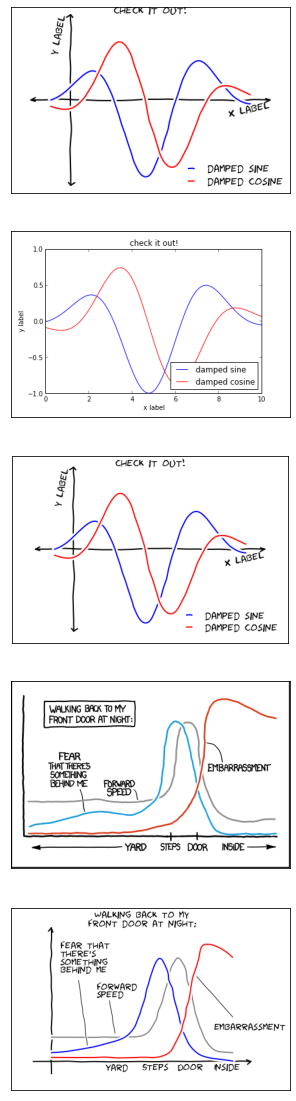

In [11]:
outputs = resources["outputs"]
outputs_len = len(outputs)

plt.figure(figsize = [5,20])
for i, pic_name in enumerate(outputs.keys()):
    plt.subplot(outputs_len, 1, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(
        plt.imread(
            io.BytesIO(outputs[pic_name]), format='jpeg'
        )
    )

# Препроцессоры

Рассмотренные выше expoter-ы применяют к notebook препроцессоры - которые собвенно и занимаются обработкой notebook. Подробнее об механизме <a href=https://nbconvert.readthedocs.io/en/latest/nbconvert_library.html#Extracting-Figures-using-the-HTML-Exporter>тут</a>. Суть в ном что exporter-ы можно настраивать используя препроцессоры. nbconvert предоставляет ряд собственных препроцессоров, которые будут рассмотрены далее.

### `ExtractOutputPreprocessor`

Позволяет сохранять результаты ячеек в ресусы

Вот за одно и пример добавления препроцессора.

In [12]:
c = Config()
c.HTMLExporter.preprocessors = ['nbconvert.preprocessors.ExtractOutputPreprocessor']

# create the new exporter using the custom config
html_exporter_with_figs = HTMLExporter(config=c)
html_exporter_with_figs.preprocessors

['nbconvert.preprocessors.ExtractOutputPreprocessor']

Сравнение результатов работы `html_exporter` без использованием препросцессора `ExtractOutputPreprocessor` и с ним.

In [13]:
(_, resources) = html_exporter.from_notebook_node(notebook)
(_, resources_with_fig) = html_exporter_with_figs.from_notebook_node(notebook)

print("resources without figures:")
print(sorted(resources.keys()))

print("\nresources with extracted figures (notice that there's one more field called 'outputs'):")
print(sorted(resources_with_fig.keys()))

print("\nthe actual figures are:")
print(sorted(resources_with_fig['outputs'].keys()))

resources without figures:
['deprecated', 'global_content_filter', 'html_manager_semver_range', 'include_css', 'include_js', 'include_lab_theme', 'include_url', 'inlining', 'jquery_url', 'jupyter_widgets_base_url', 'mathjax_url', 'metadata', 'output_extension', 'raw_mimetypes', 'require_js_url', 'theme', 'widget_renderer_url']

resources with extracted figures (notice that there's one more field called 'outputs'):
['deprecated', 'global_content_filter', 'html_manager_semver_range', 'include_css', 'include_js', 'include_lab_theme', 'include_url', 'inlining', 'jquery_url', 'jupyter_widgets_base_url', 'mathjax_url', 'metadata', 'output_extension', 'outputs', 'raw_mimetypes', 'require_js_url', 'theme', 'widget_renderer_url']

the actual figures are:
['output_13_1.png', 'output_16_0.png', 'output_18_1.png', 'output_3_0.png', 'output_5_0.png']


Как видно во втором случае в ресурсах появился ещё и ключ `'outputs'`. А по доступу к именам там содержаться результаты выполнения ячеек.

# Кастомные препроцессоры

Для создания кастомного препроцессора следует наследовать класс `nbconvert.preprocessors.Preprocessor`.

In [14]:
from traitlets import Integer
from nbconvert.preprocessors import Preprocessor


class PelicanSubCell(Preprocessor):
    """A Pelican specific preprocessor to remove some of the cells of a notebook"""

    # I could also read the cells from nb.metadata.pelican if someone wrote a JS extension,
    # but for now I'll stay with configurable value.
    start = Integer(0, help="first cell of notebook to be converted").tag(config=True)
    end = Integer(-1, help="last cell of notebook to be converted").tag(config=True)

    def preprocess(self, nb, resources):
        self.log.info("I'll keep only cells from %d to %d", self.start, self.end)
        nb.cells = nb.cells[self.start : self.end]
        return nb, resources

Затем при создании `Config` в поле `preprocessors` следует передать созданный класс. Для заполенения полей препроцессора в кофиг указываются поля по типу `<Имя класса>.<навание поля>`, как это показано ниже.

In [15]:
# Create a new config object that configures both the new preprocessor, as well as the exporter
c = Config()
c.PelicanSubCell.start = 4
c.PelicanSubCell.end = 6
c.RSTExporter.preprocessors = [PelicanSubCell]

# Create our new, customized exporter that uses our custom preprocessor
pelican = RSTExporter(config=c)

# Process the notebook
print(pelican.from_notebook_node(notebook)[0])

Sometimes when showing schematic plots, this is the type of figure I
want to display. But drawing it by hand is a pain: I’d rather just use
matplotlib. The problem is, matplotlib is a bit too precise. Attempting
to duplicate this figure in matplotlib leads to something like this:

.. code:: ipython3

    Image('http://jakevdp.github.com/figures/mpl_version.png')




.. image:: output_5_0.png



